In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [11]:
# params
BATCH_SIZE = 512
NUM_EPOCH = 10
NUM_CLASSES = 10
LEARNING_RATE = 0.001
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                            ]))
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                        ]))

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [13]:
class LeNet5(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding=2),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.flatten = nn.Flatten()
        self.fc1 = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        self.fc3 = nn.Linear(84, NUM_CLASSES)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [14]:
model = LeNet5()
loss_list = []
acc_list = []

In [19]:
def train(num_epoch):
    model.to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    criterion = nn.CrossEntropyLoss()

    model.train()
    for epoch in range(num_epoch):
        step = 0
        for X, y in train_loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()

            # eval
            with torch.no_grad():
                if step%20 == 0:
                    acc = cal_acc(y_hat, y)
                    print(f"epoch {epoch}, step {step}\nloss = {loss}, acc = {acc}")
                if step == 100:
                    loss_list.append(loss.cpu().detach().numpy())
                    acc_list.append(acc.cpu().detach().numpy())
                step += 1

def cal_acc(y_hat, y):
    # use argmax to boost computation
    y_hat, y = y_hat.to(DEVICE), y.to(DEVICE)
    y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return cmp.type(y.dtype).sum() / y_hat.shape[0]

def draw():
    epoch = range(NUM_EPOCH)
    plt.subplot(1,2,1)
    plt.plot(epoch, loss_list)
    plt.title('Loss')

    plt.subplot(1,2,2)
    plt.plot(epoch, acc_list)
    plt.title('Accuracy')
    plt.show()

epoch 0, step 0
loss = 2.3180551528930664, acc = 0.08203125
epoch 0, step 20
loss = 0.7968359589576721, acc = 0.845703125
epoch 0, step 40
loss = 0.2625175416469574, acc = 0.916015625
epoch 0, step 60
loss = 0.16309690475463867, acc = 0.958984375
epoch 0, step 80
loss = 0.10907073318958282, acc = 0.96875
epoch 0, step 100
loss = 0.10438583046197891, acc = 0.97265625
epoch 1, step 0
loss = 0.09235811233520508, acc = 0.97265625
epoch 1, step 20
loss = 0.07784823328256607, acc = 0.97265625
epoch 1, step 40
loss = 0.14075946807861328, acc = 0.962890625
epoch 1, step 60
loss = 0.052945174276828766, acc = 0.986328125
epoch 1, step 80
loss = 0.056398168206214905, acc = 0.9765625
epoch 1, step 100
loss = 0.05806367099285126, acc = 0.984375
epoch 2, step 0
loss = 0.05838647484779358, acc = 0.98828125
epoch 2, step 20
loss = 0.05443236231803894, acc = 0.98046875
epoch 2, step 40
loss = 0.043474067002534866, acc = 0.9921875
epoch 2, step 60
loss = 0.023402933031320572, acc = 0.994140625
epoch 2, 

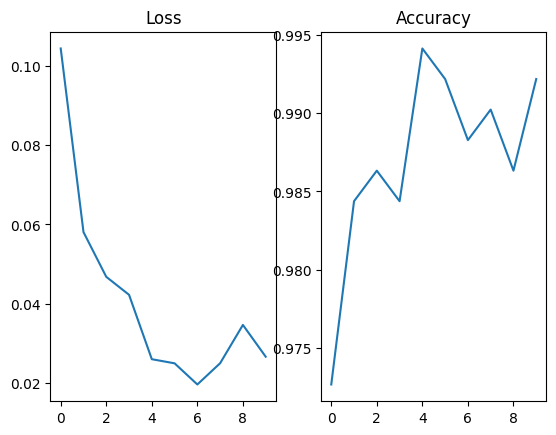

In [16]:
train(NUM_EPOCH)
draw()

In [17]:
def test():
    total_acc = 0
    step = 0
    model.to(DEVICE)
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            y_hat = model(X)
            acc = cal_acc(y_hat, y)
            total_acc += acc
            print(f"batch {step} acc: {acc}")
            step += 1
        print(f"total acc {total_acc / step}")

In [18]:
test()

batch 0 acc: 0.9921875
batch 1 acc: 0.982421875
batch 2 acc: 0.98046875
batch 3 acc: 0.978515625
batch 4 acc: 0.982421875
batch 5 acc: 0.98046875
batch 6 acc: 0.986328125
batch 7 acc: 0.986328125
batch 8 acc: 0.98828125
batch 9 acc: 0.986328125
batch 10 acc: 0.998046875
batch 11 acc: 0.990234375
batch 12 acc: 0.990234375
batch 13 acc: 0.9921875
batch 14 acc: 1.0
batch 15 acc: 0.99609375
batch 16 acc: 0.994140625
batch 17 acc: 0.998046875
batch 18 acc: 0.99609375
batch 19 acc: 0.9926470518112183
total acc 0.9895737767219543
